In [3]:
import pandas as pd

In [4]:
df = pd.read_excel('Cancer_dataset_1500_.xlsx', engine='openpyxl')

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1500 entries, 0 to 1499
Data columns (total 9 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Age               1500 non-null   int64  
 1   Gender            1500 non-null   int64  
 2   BMI               1500 non-null   float64
 3   Smoking           1500 non-null   int64  
 4   GeneticRisk       1500 non-null   int64  
 5   PhysicalActivity  1500 non-null   float64
 6   AlcoholIntake     1500 non-null   float64
 7   CancerHistory     1500 non-null   int64  
 8   Diagnosis         1500 non-null   int64  
dtypes: float64(3), int64(6)
memory usage: 105.6 KB


In [6]:
df.head()

,Age,Gender,BMI,Smoking,GeneticRisk,PhysicalActivity,AlcoholIntake,CancerHistory,Diagnosis
0,58,1,16.085313,0,1,8.146251,4.148219,1,1
1,71,0,30.828784,0,1,9.361630,3.519683,0,0
2,48,1,38.785084,0,2,5.135179,4.728368,0,1
3,34,0,30.040296,0,0,9.502792,2.044636,0,0
4,62,1,35.479721,0,0,5.356890,3.309849,0,1


In [7]:
df.isnull().sum()

Age                 0
Gender              0
BMI                 0
Smoking             0
GeneticRisk         0
PhysicalActivity    0
AlcoholIntake       0
CancerHistory       0
Diagnosis           0
dtype: int64

## Data is clean

In [8]:
x_features = df.drop('Diagnosis', axis=1)

In [9]:
x_features

,Age,Gender,BMI,Smoking,GeneticRisk,PhysicalActivity,AlcoholIntake,CancerHistory
0,58,1,16.085313,0,1,8.146251,4.148219,1
1,71,0,30.828784,0,1,9.361630,3.519683,0
2,48,1,38.785084,0,2,5.135179,4.728368,0
3,34,0,30.040296,0,0,9.502792,2.044636,0
4,62,1,35.479721,0,0,5.356890,3.309849,0
...,...,...,...,...,...,...,...,...
1495,62,1,25.090025,0,0,9.892167,1.284158,0
1496,31,0,33.447125,0,1,1.668297,2.280636,1
1497,63,1,32.613861,1,1,0.466848,0.150101,0
1498,55,0,25.568216,0,0,7.795317,1.986138,1


In [10]:
y_target = df['Diagnosis']

In [11]:
y_target

0       1
1       0
2       1
3       0
4       1
       ..
1495    1
1496    1
1497    1
1498    1
1499    0
Name: Diagnosis, Length: 1500, dtype: int64

In [12]:
from sklearn.model_selection import train_test_split

In [13]:
X_train, X_test, y_train, y_test = train_test_split(x_features, y_target, test_size=0.1, random_state=42)

### 10% of features are choosen for testing

In [14]:
y_test.info()

<class 'pandas.core.series.Series'>
Index: 150 entries, 1116 to 782
Series name: Diagnosis
Non-Null Count  Dtype
--------------  -----
150 non-null    int64
dtypes: int64(1)
memory usage: 2.3 KB


In [15]:
y_test

1116    1
1368    1
422     0
413     0
451     0
       ..
1312    1
694     1
1001    0
322     0
782     0
Name: Diagnosis, Length: 150, dtype: int64

## Heat map

In [17]:
import matplotlib.pyplot as plt
import seaborn as sns

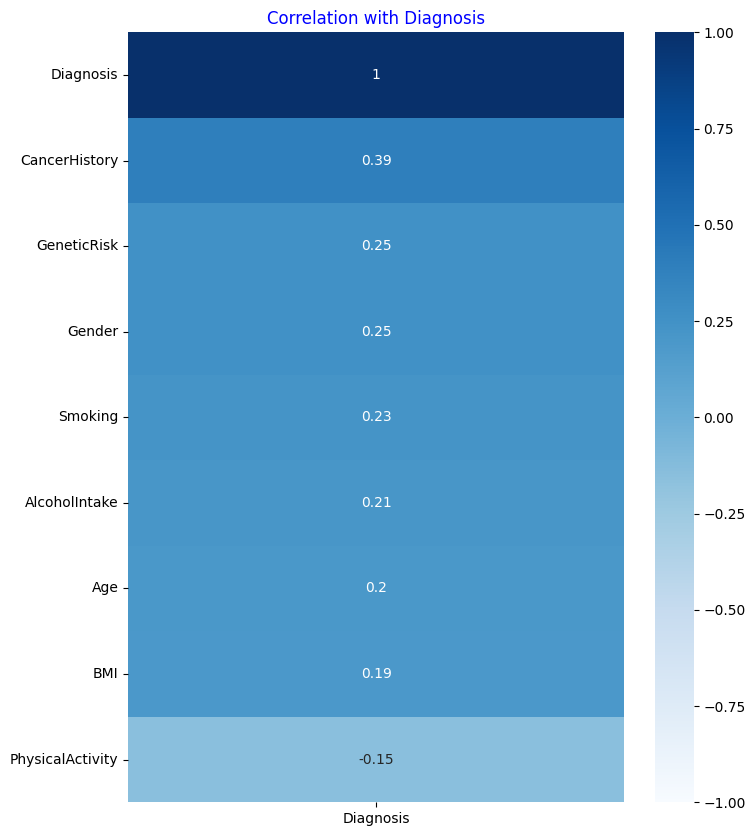

In [19]:
# List of features used in the model
features = ['Age', 'Gender', 'BMI', 'Smoking', 'GeneticRisk', 'PhysicalActivity', 'AlcoholIntake', 'CancerHistory']
data_filtered = df[features + ['Diagnosis']]
# Compute the correlation matrix
corr_matrix = data_filtered.corr()
# Plotting
plt.figure(figsize=(8, 10))
sns.heatmap(corr_matrix[['Diagnosis']].sort_values(by='Diagnosis', ascending=False), annot=True, cmap='Blues', vmin=-1, vmax=1)
plt.title('Correlation with Diagnosis', color='blue', fontsize=12)
plt.show()

In [25]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.semi_supervised import LabelPropagation, LabelSpreading
from xgboost import XGBClassifier
from sklearn.tree import DecisionTreeClassifier, ExtraTreeClassifier
from sklearn.ensemble import ExtraTreesClassifier, RandomForestClassifier, BaggingClassifier, AdaBoostClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC, NuSVC
from sklearn.neighbors import NearestCentroid
from sklearn.linear_model import LogisticRegression, RidgeClassifierCV, RidgeClassifier, SGDClassifier, Perceptron, PassiveAggressiveClassifier
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis, QuadraticDiscriminantAnalysis
from sklearn.calibration import CalibratedClassifierCV
from sklearn.naive_bayes import BernoulliNB, GaussianNB
from sklearn.dummy import DummyClassifier
from sklearn.metrics import accuracy_score
import time
# Features and target
X = df.drop('Diagnosis', axis=1)
y = df['Diagnosis']

# Splitting the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.1, random_state=42)

# Standardizing the data
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Models to evaluate
models = {
    "LabelPropagation": LabelPropagation(),
    "XGBClassifier": XGBClassifier(use_label_encoder=False, eval_metric='logloss'),
    "DecisionTreeClassifier": DecisionTreeClassifier(),
    "ExtraTreeClassifier": ExtraTreeClassifier(),
    "ExtraTreesClassifier": ExtraTreesClassifier(),
    "RandomForestClassifier": RandomForestClassifier(),
    "BaggingClassifier": BaggingClassifier(),
    "AdaBoostClassifier": AdaBoostClassifier(),
    "KNeighborsClassifier": KNeighborsClassifier(),
    "SVC": SVC(),
    "NuSVC": NuSVC(),
    "NearestCentroid": NearestCentroid(),
    "LogisticRegression": LogisticRegression(),
    "LinearDiscriminantAnalysis": LinearDiscriminantAnalysis(),
    "CalibratedClassifierCV": CalibratedClassifierCV(),
    "RidgeClassifierCV": RidgeClassifierCV(),
    "RidgeClassifier": RidgeClassifier(),
    "BernoulliNB": BernoulliNB(),
    "QuadraticDiscriminantAnalysis": QuadraticDiscriminantAnalysis(),
    "SGDClassifier": SGDClassifier(),
    "GaussianNB": GaussianNB(),
    "PassiveAggressiveClassifier": PassiveAggressiveClassifier(),
    "Perceptron": Perceptron(),
    "DummyClassifier": DummyClassifier()
}


# Evaluate each model
accuracies = {}
for name, model in models.items():
    model.fit(X_train_scaled, y_train)
    y_pred = model.predict(X_test_scaled)
    accuracy = accuracy_score(y_test, y_pred)
    accuracies[name] = accuracy
    time.sleep(2)
    print(f"{name} Accuracy: {accuracy:.4f}")

# Determine the most accurate model
best_model = max(accuracies, key=accuracies.get)
print(f"\nMost accurate model: {best_model} with accuracy {accuracies[best_model]:.4f}")

LabelPropagation Accuracy: 0.8933
XGBClassifier Accuracy: 0.9533
DecisionTreeClassifier Accuracy: 0.8867
ExtraTreeClassifier Accuracy: 0.8000
ExtraTreesClassifier Accuracy: 0.9333
RandomForestClassifier Accuracy: 0.9533
BaggingClassifier Accuracy: 0.9400
AdaBoostClassifier Accuracy: 0.9133
KNeighborsClassifier Accuracy: 0.9333
SVC Accuracy: 0.9133
NuSVC Accuracy: 0.9067
NearestCentroid Accuracy: 0.8667
LogisticRegression Accuracy: 0.8600
LinearDiscriminantAnalysis Accuracy: 0.8600
CalibratedClassifierCV Accuracy: 0.8533
RidgeClassifierCV Accuracy: 0.8600
RidgeClassifier Accuracy: 0.8600
BernoulliNB Accuracy: 0.8867
QuadraticDiscriminantAnalysis Accuracy: 0.8667
SGDClassifier Accuracy: 0.8267
GaussianNB Accuracy: 0.8600
PassiveAggressiveClassifier Accuracy: 0.7467
Perceptron Accuracy: 0.8000
DummyClassifier Accuracy: 0.5800

Most accurate model: XGBClassifier with accuracy 0.9533


In [38]:
best_model = max(accuracies, key=accuracies.get)

str

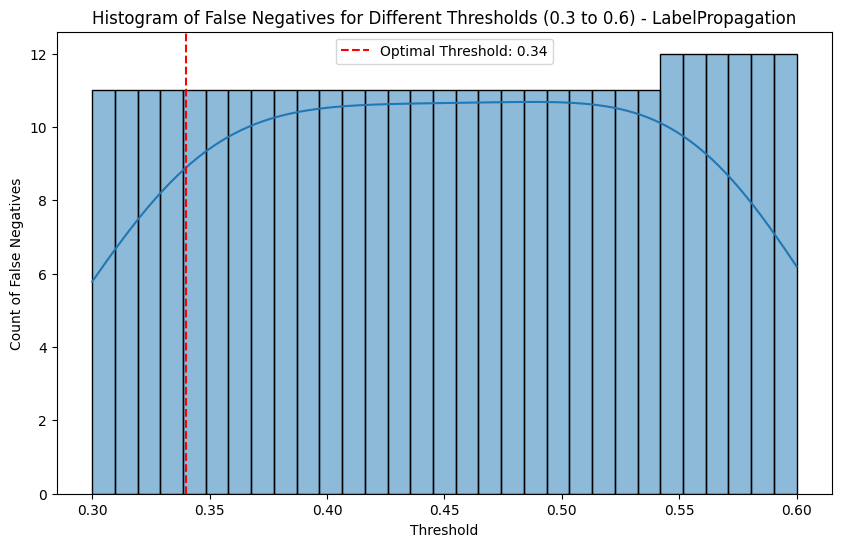

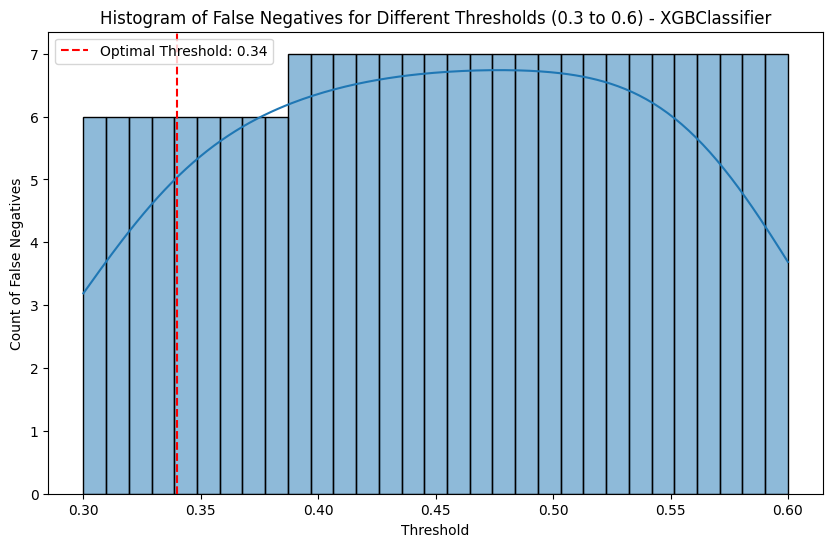

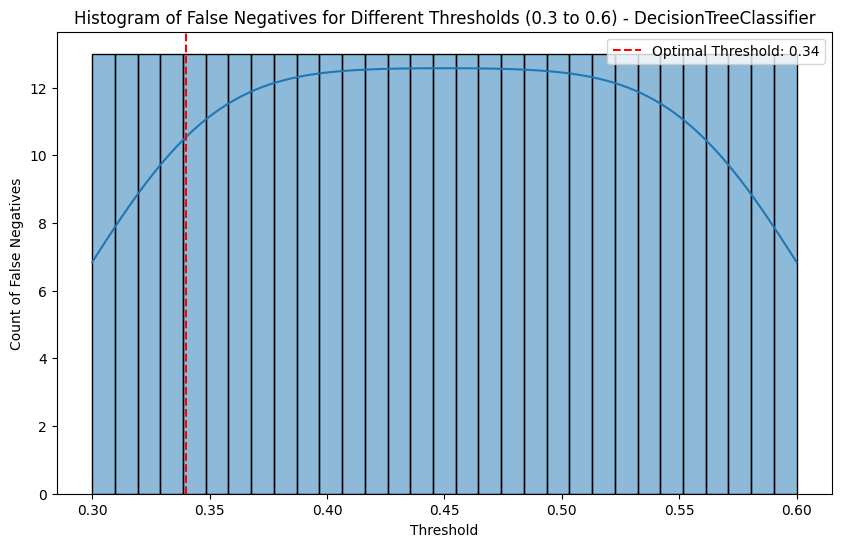

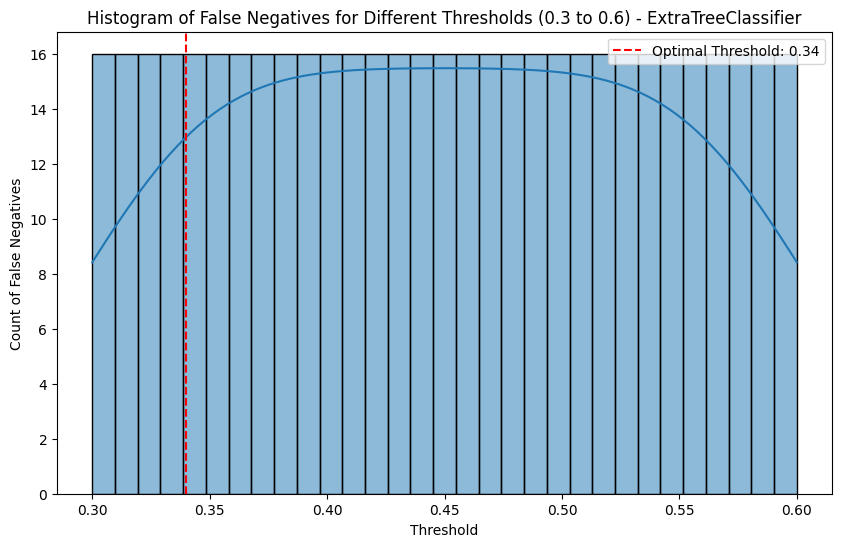

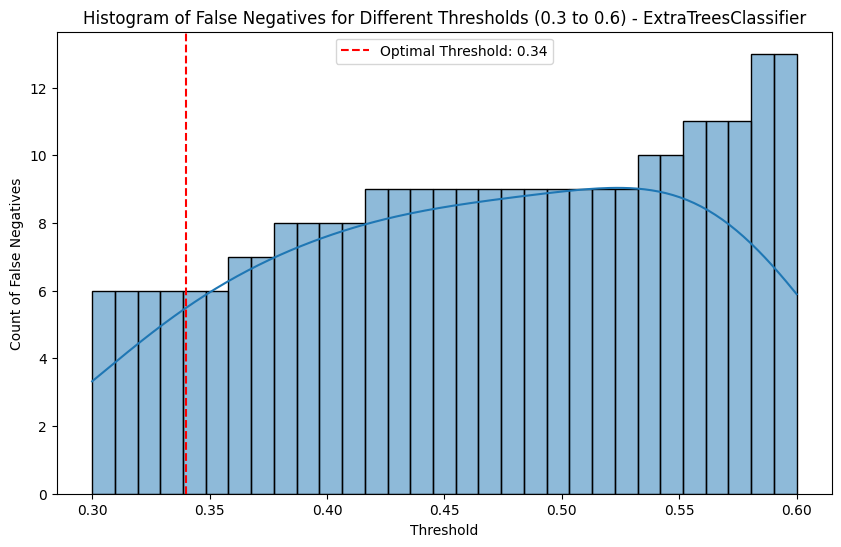

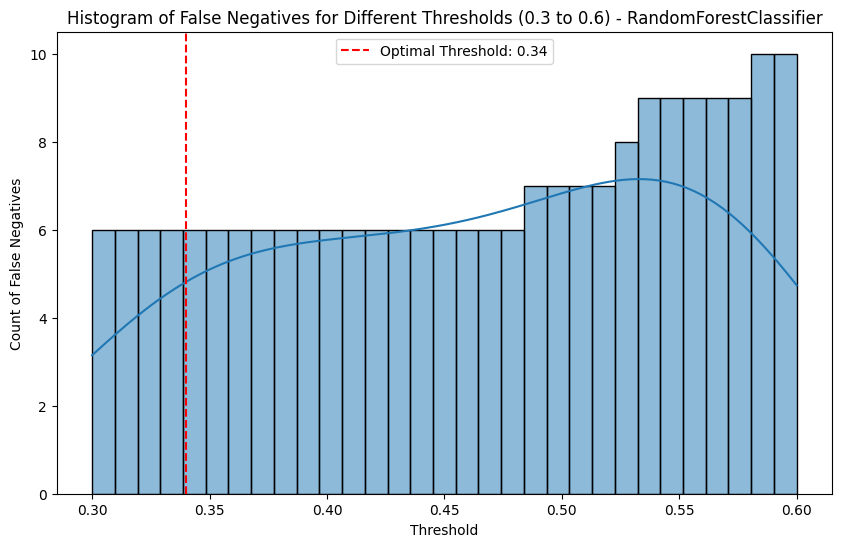

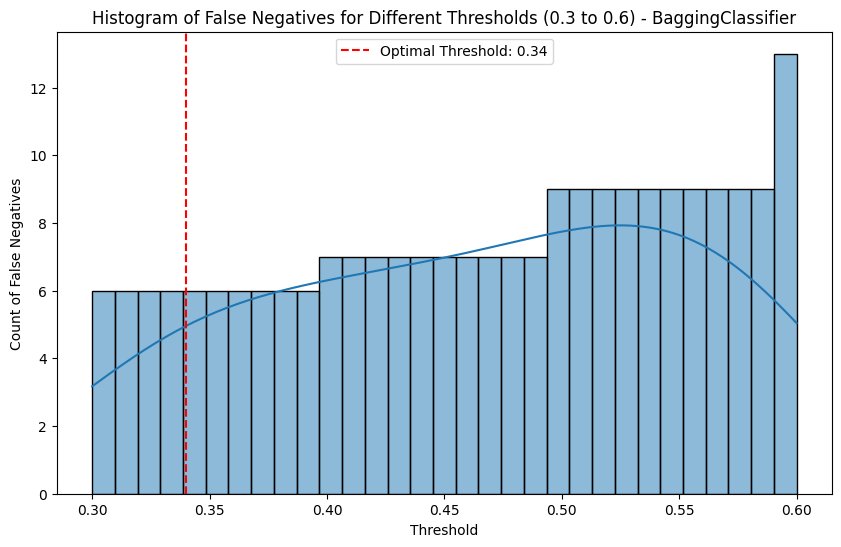

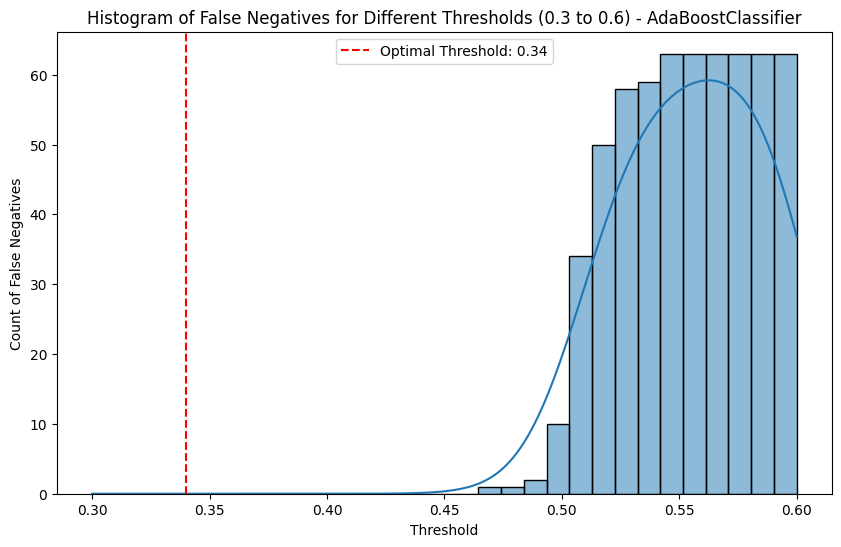

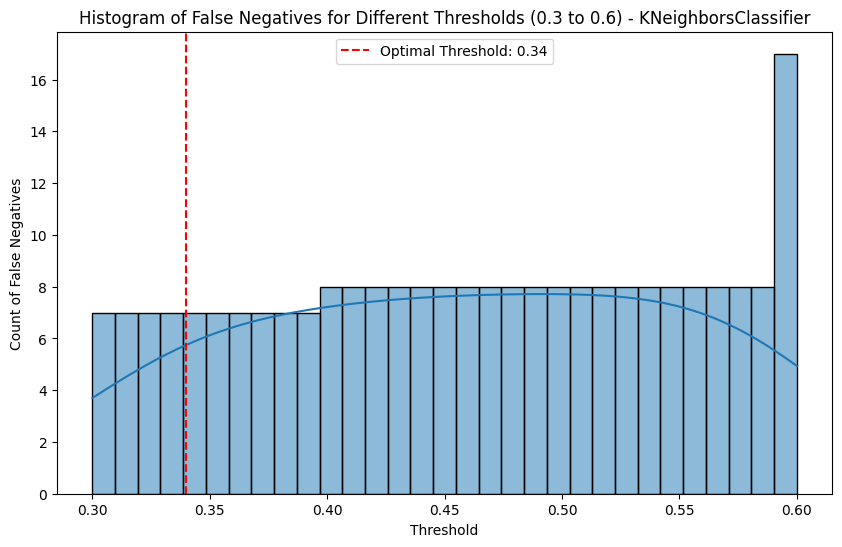

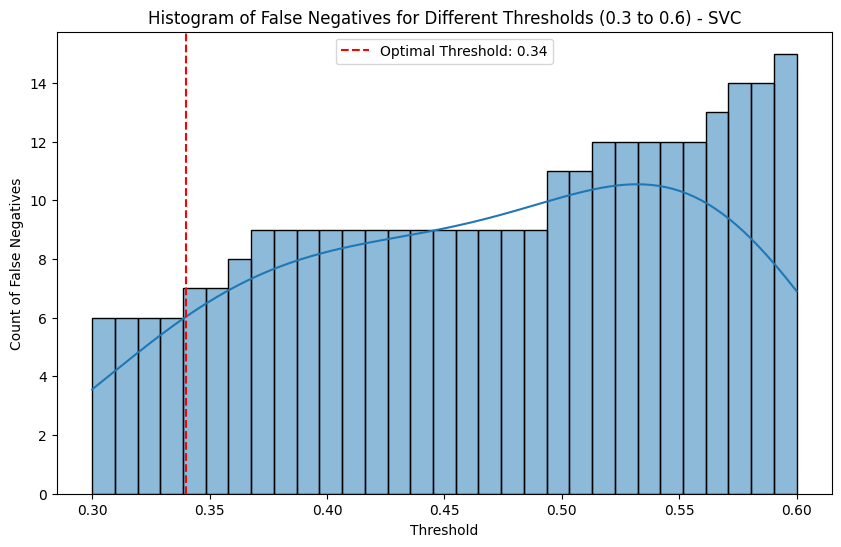

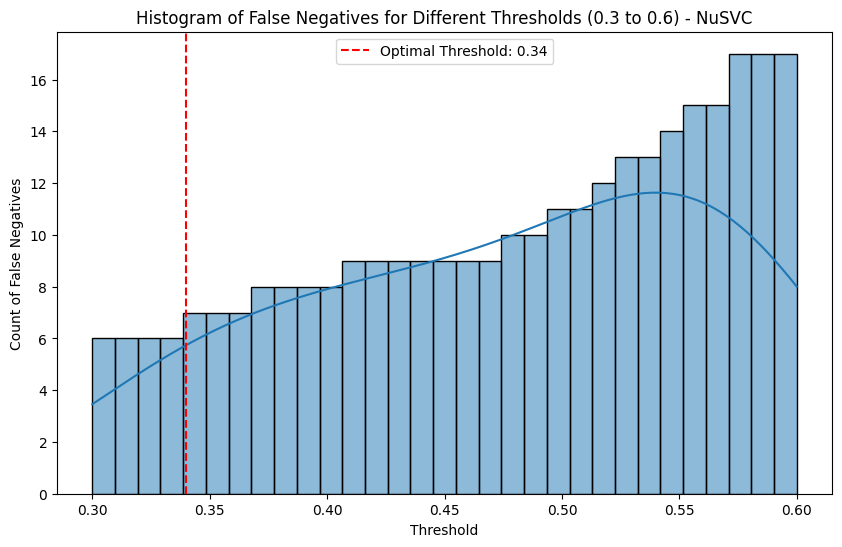

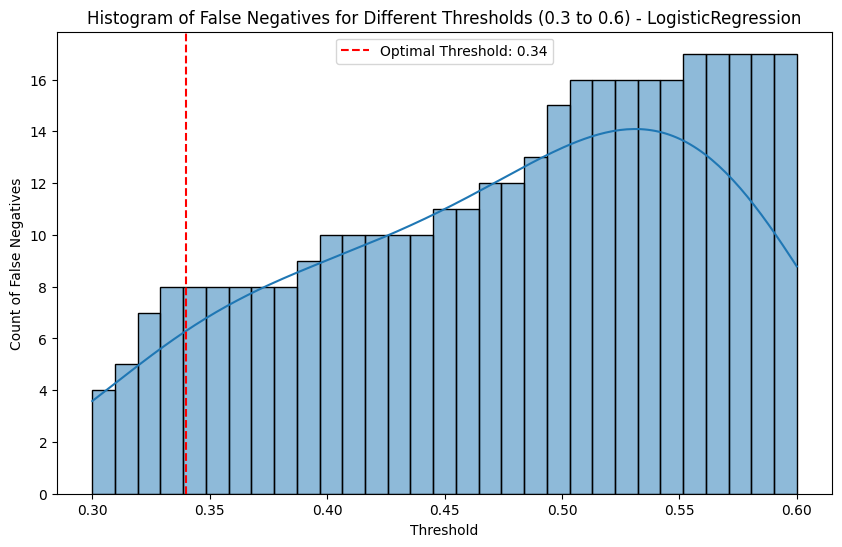

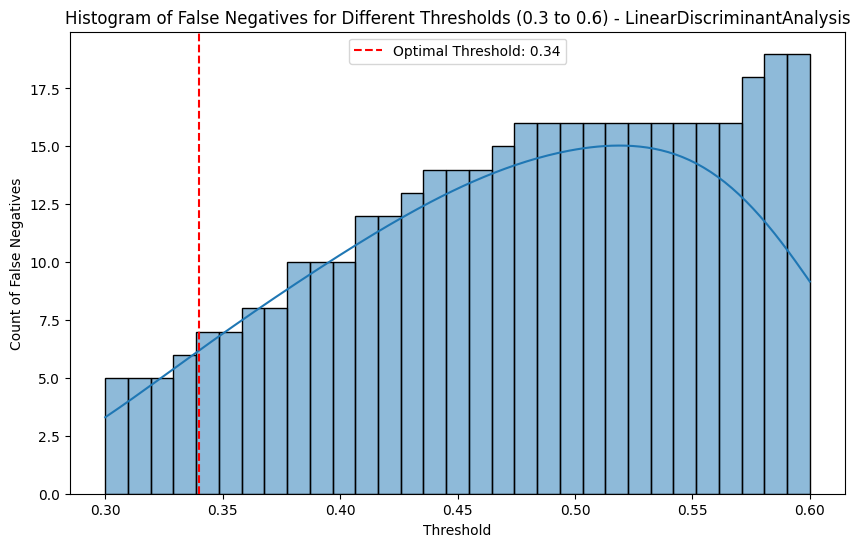

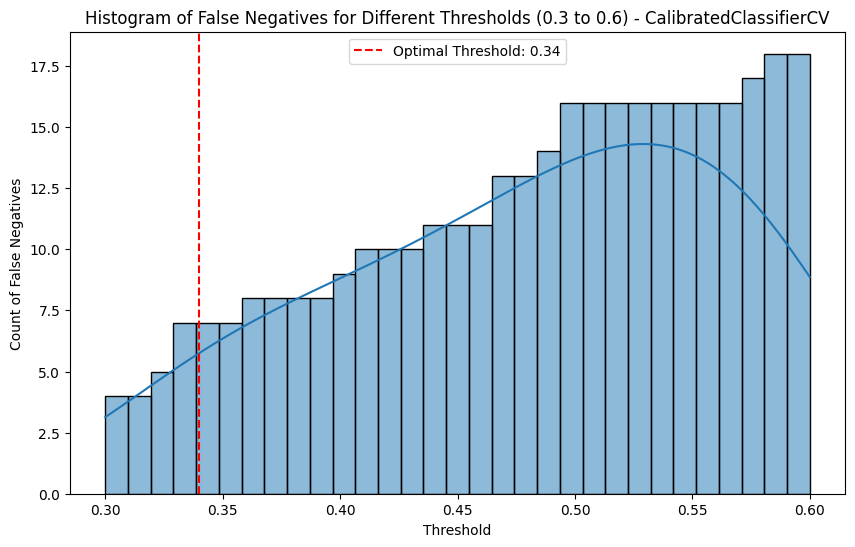

RidgeClassifierCV does not support predict_proba. Skipping.
RidgeClassifier does not support predict_proba. Skipping.


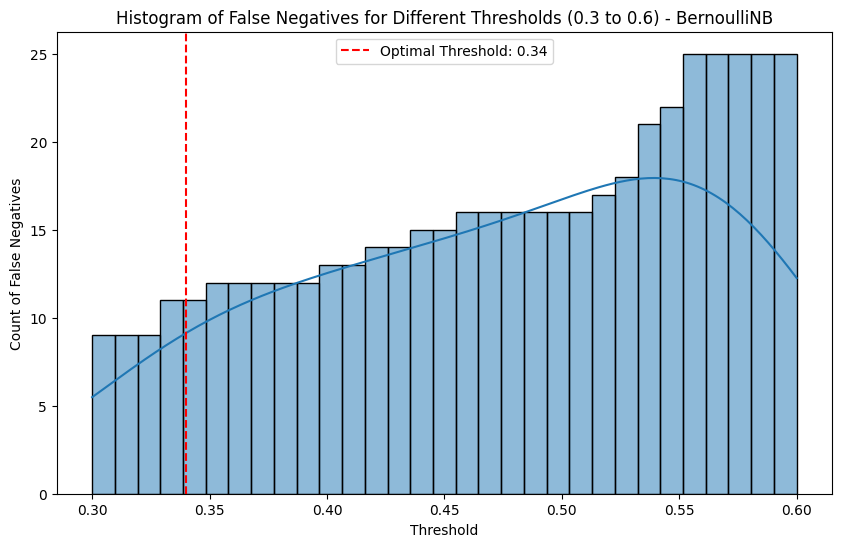

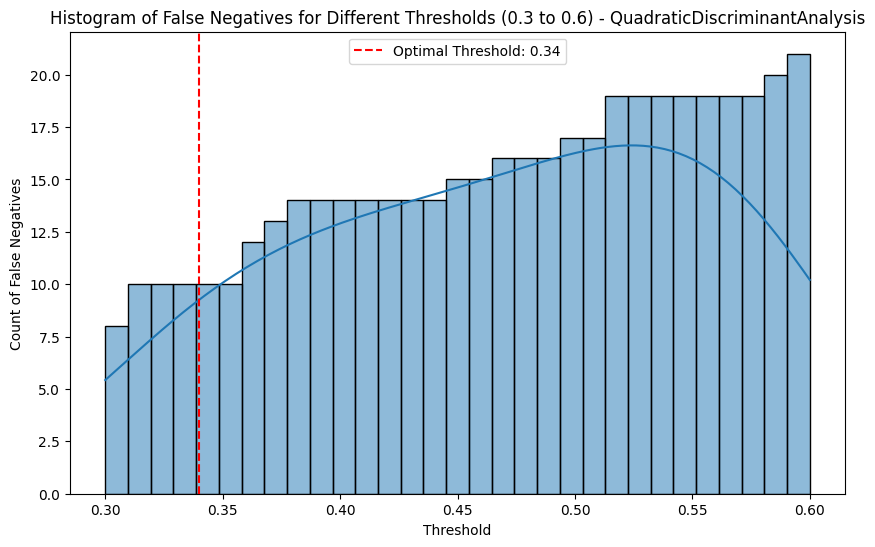

SGDClassifier does not support predict_proba. Skipping.


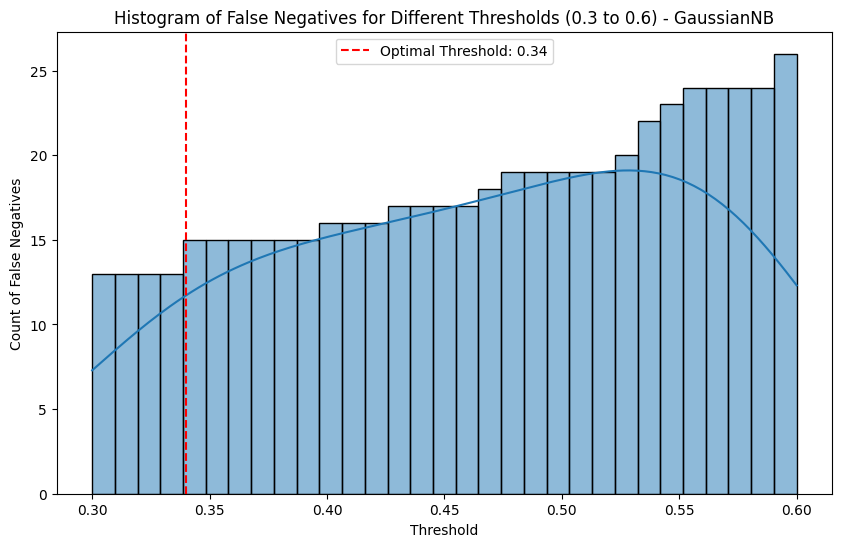

PassiveAggressiveClassifier does not support predict_proba. Skipping.
Perceptron does not support predict_proba. Skipping.


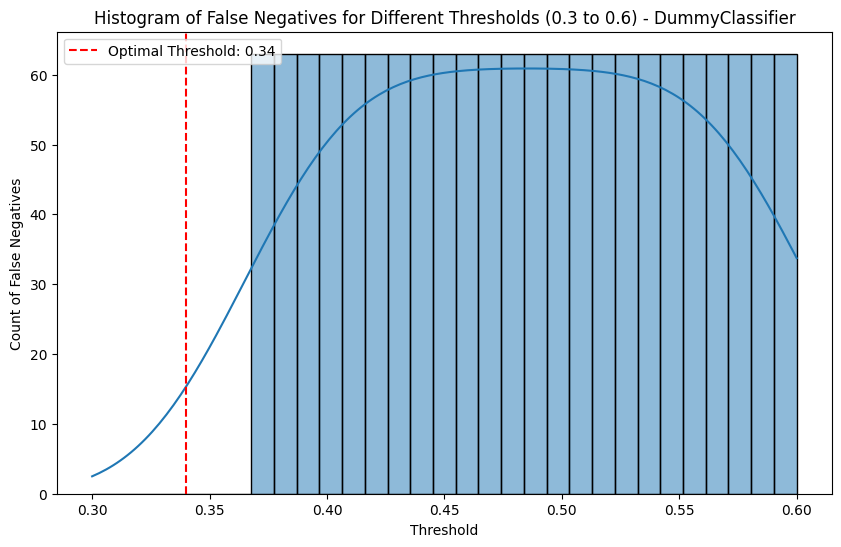

In [37]:
# Evaluate each model
for model_name, model in models.items():
    try:
        model.fit(X_train_scaled, y_train)
        y_prob = model.predict_proba(X_test_scaled)[:, 1]
    except AttributeError:
        print(f"{model_name} does not support predict_proba. Skipping.")
        continue

    thresholds = np.arange(0.3, 0.61, 0.01)
    metrics = {'Threshold': [], 'False Negatives': []}

    for threshold in thresholds:
        y_pred = (y_prob >= threshold).astype(int)
        tn, fp, fn, tp = confusion_matrix(y_test, y_pred).ravel()
        metrics['Threshold'].append(threshold)
        metrics['False Negatives'].append(fn)

    metrics_df = pd.DataFrame(metrics)

    plt.figure(figsize=(10, 6))
    sns.histplot(metrics_df, x='Threshold', weights='False Negatives', bins=len(thresholds), kde=True)
    plt.xlabel('Threshold')
    plt.ylabel('Count of False Negatives')
    plt.title(f'Histogram of False Negatives for Different Thresholds (0.3 to 0.6) - {model_name}')
    plt.axvline(0.34, color='r', linestyle='--', label='Optimal Threshold: 0.34')
    plt.legend()
    plt.show()


## Analysis on Best Model

In [42]:
import pickle
import numpy as np
from sklearn.metrics import accuracy_score, confusion_matrix


Most accurate model: XGBClassifier with accuracy 0.9533
Best model saved to 'best_model.pkl'


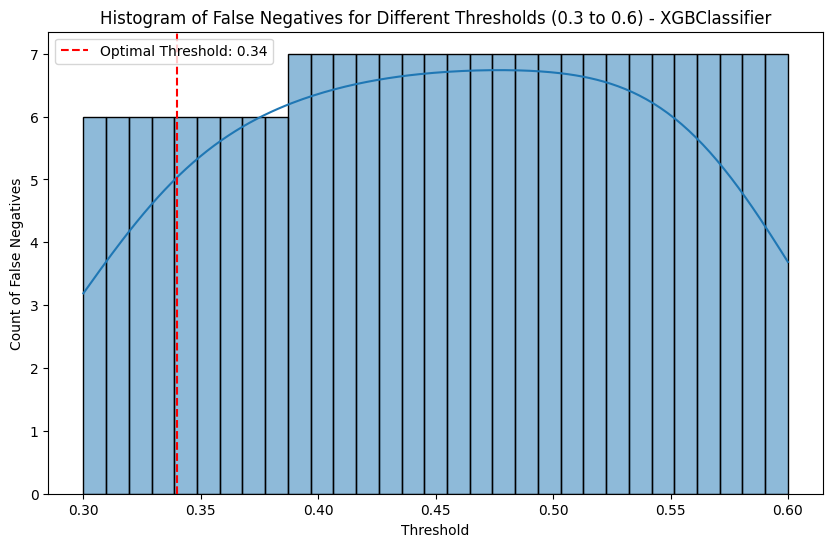

In [44]:
best_model_name = max(accuracies, key=accuracies.get)
best_model = models[best_model_name]
print(f"\nMost accurate model: {best_model_name} with accuracy {accuracies[best_model_name]:.4f}")

# Save the best model to a pkl file
with open('best_model.pkl', 'wb') as file:
    pickle.dump(best_model, file)

with open('scaler.pkl', 'wb') as scaler_file:
    pickle.dump(scaler, scaler_file)

print("Best model saved to 'best_model.pkl'")

# Now let's plot the histogram of false negatives for the best model
y_prob = best_model.predict_proba(X_test_scaled)[:, 1]
thresholds = np.arange(0.3, 0.61, 0.01)
metrics = {'Threshold': [], 'False Negatives': []}

for threshold in thresholds:
    y_pred = (y_prob >= threshold).astype(int)
    tn, fp, fn, tp = confusion_matrix(y_test, y_pred).ravel()
    metrics['Threshold'].append(threshold)
    metrics['False Negatives'].append(fn)

metrics_df = pd.DataFrame(metrics)

plt.figure(figsize=(10, 6))
sns.histplot(metrics_df, x='Threshold', weights='False Negatives', bins=len(thresholds), kde=True)
plt.xlabel('Threshold')
plt.ylabel('Count of False Negatives')
plt.title(f'Histogram of False Negatives for Different Thresholds (0.3 to 0.6) - {best_model_name}')
plt.axvline(0.34, color='r', linestyle='--', label='Optimal Threshold: 0.34')
plt.legend()
plt.show()